In [1]:
# Load Extensions

# cpu line profiler
%load_ext line_profiler
# memory profiler
%load_ext memory_profiler
# Cython support
%load_ext Cython

# Reload modules before executing user code
%load_ext autoreload
%autoreload 2

# setup backend for matplotlibs plots
%matplotlib inline

In [8]:
# Imports
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from slow_example import reallySlowGenerateTimeSeriesData

In [12]:
import math
import random

# Really slow generation of synthetic data
def reallySlowGenerateTimeSeriesData(seconds,samples_per_second):
    """Generate synthetic data"""
    
    time = []
    signal = []   
    
    # generate signal
    sample_time = 0
    for s in range(seconds):        
        for sps in range(samples_per_second):
            sample_time += 1/samples_per_second
            noise = random.random()
            scaled_noise = -1 + (noise * 2)
            sample = math.sin(2*math.pi*10*sample_time) + scaled_noise
            time.append(sample_time)
            signal.append(sample)
    
    # return time and signal
    return [time,signal]

In [13]:
%lprun -f reallySlowGenerateTimeSeriesData data = reallySlowGenerateTimeSeriesData(60*60,1000)

Timer unit: 1e-06 s

Total time: 13.9223 s
File: <ipython-input-12-1eccf348d98e>
Function: reallySlowGenerateTimeSeriesData at line 5

Line #      Hits         Time  Per Hit   % Time  Line Contents
     5                                           def reallySlowGenerateTimeSeriesData(seconds,samples_per_second):
     6                                               """Generate synthetic data"""
     7                                               
     8         1          1.0      1.0      0.0      time = []
     9         1          0.0      0.0      0.0      signal = []   
    10                                               
    11                                               # generate signal
    12         1          0.0      0.0      0.0      sample_time = 0
    13      3601       1758.0      0.5      0.0      for s in range(seconds):        
    14   3603600    1547967.0      0.4     11.1          for sps in range(samples_per_second):
    15   3600000    1882251.0      0.5     1

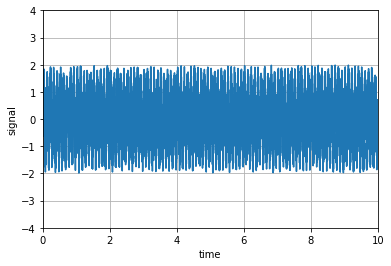

In [9]:
fig,axes=plt.subplots()
plt.plot(data[0], data[1])
plt.xlim(0, 10)
plt.ylim(-4, 4)
plt.xlabel('time')
plt.ylabel('signal')
plt.grid(True)
plt.show()